In [2]:
# Basic imports
import numpy as np
from keras.datasets import imdb
(trainData, trainLabels), (testData, testLabels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 19s 1us/step


In [7]:
# Decoding a review (optional)
wordIndex = imdb.get_word_index()
reverseWordIndex = dict( [(value, key) for (key, value) in wordIndex.items() ])
decodedReview = ' '.join( [reverseWordIndex.get(i-3, '?') for i in trainData[2]])
print(decodedReview)

? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


In [69]:
# Data vectorization function
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorizing the inputs
xTrain = vectorize(trainData)
xTest = vectorize(testData)

# Vectorizing the targets
yTrain = np.asarray(trainLabels).astype('float32')
# yTrainNeg = np.ones(len(yTrain))- yTrain
# yTrain2 = to_categorical(yTrain)
# yTrain2 =  np.array([yTrain, yTrainNeg]).transpose()
yTest = np.asarray(testLabels).astype('float32')
# yTestNeg = np.ones(len(yTest))- yTest
# yTest2 =  np.array([yTest, yTestNeg]).transpose()
# yTest2 = to_categorical(yTest)

In [59]:
from keras.utils.np_utils import to_categorical
print(to_categorical(yTrain)-yTrain2)


[[-1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 ...
 [ 1. -1.]
 [-1.  1.]
 [ 1. -1.]]


In [71]:
# Setting the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [73]:
# Taking part of the data
xTrainRest = xTrain[:10000]
xTrainPart = xTrain[10000:]

yTrainRest = yTrain[:10000]
yTrainPart = yTrain[10000:]

In [74]:
history = model.fit(xTrainPart, yTrainPart, epochs = 20, batch_size=512, validation_data=(xTrainRest,yTrainRest))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.5169 - acc: 0.7888 - val_loss: 0.4177 - val_acc: 0.8439
Epoch 2/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.3173 - acc: 0.9019 - val_loss: 0.3124 - val_acc: 0.8860
Epoch 3/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.2304 - acc: 0.9260 - val_loss: 0.2995 - val_acc: 0.8811
Epoch 4/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1816 - acc: 0.9414 - val_loss: 0.2918 - val_acc: 0.8824
Epoch 5/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1455 - acc: 0.9542 - val_loss: 0.2883 - val_acc: 0.8850
Epoch 6/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1192 - acc: 0.9649 - val_loss: 0.2933 - val_acc: 0.8873
Epoch 7/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.0968 - acc: 0.9723 - val_loss: 0.3109 - 

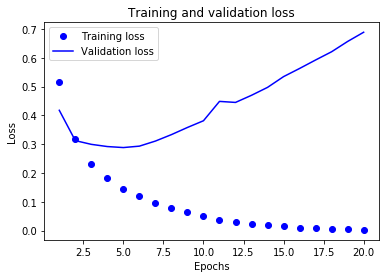

In [75]:
# Plotting the loss function
import matplotlib.pyplot as plt

historyDict = history.history
losses = historyDict['loss']
lossValues = historyDict['val_loss']

epochs = range(1, len(losses)+1)

plt.clf()
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, lossValues, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

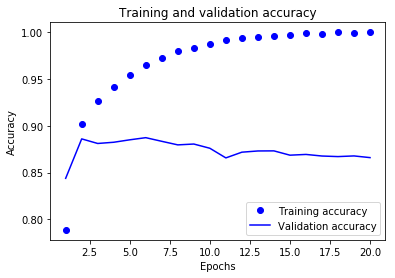

In [76]:
# Plotting the accuracy
import matplotlib.pyplot as plt

historyDict = history.history
acc = historyDict['acc']
accValues = historyDict['val_acc']

epochs = range(1, len(losses)+1)

plt.clf()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, accValues, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [77]:
# Another model
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
model2.fit(xTrain,yTrain, epochs=4, batch_size=512)
results = model2.evaluate(xTest,yTest)

Epoch 1/4
25000/25000 [==============================] - 3s 133us/step - loss: 0.4516 - acc: 0.8257
Epoch 2/4
25000/25000 [==============================] - 3s 119us/step - loss: 0.2648 - acc: 0.9086
Epoch 3/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.2045 - acc: 0.9266
Epoch 4/4
25000/25000 [==============================] - 3s 136us/step


In [79]:
print(results)

[0.2882695001888275, 0.88568]
